In [ ]:
!pip install pmdarima --upgrade --no-cache-dir





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.3 MB/s eta 0:00:00


In [4]:
!pip install numpy==1.24.4




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is 

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

tickers = ['AAPL']
data = yf.download(tickers, start='2015-01-01', end='2023-12-31')[['Close', 'Volume']].dropna()


df = data.copy()
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['MA7']  = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()
df['PctCh'] = df['Close'].pct_change()
df.dropna(inplace=True)


X = df[['Lag1', 'Lag2', 'MA7', 'MA30', 'PctCh', 'Volume']]
y = df['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(5)


Price,Close,Volume,Lag1,Lag2,MA7,MA30,PctCh
Ticker,AAPL,AAPL,,,,,
Date,,,,,,,
2015-02-13,28.380486,217088800,28.242020,27.889158,27.406453,25.448921,0.004903
2015-02-17,28.547977,252609600,28.380486,28.242020,27.658176,25.589840,0.005902
2015-02-18,28.746742,179566800,28.547977,28.380486,27.970516,25.760222,0.006962
2015-02-19,28.686441,149449600,28.746742,28.547977,28.249038,25.928520,-0.002098
2015-02-20,28.920935,195793600,28.686441,28.746742,28.487680,26.093585,0.008174


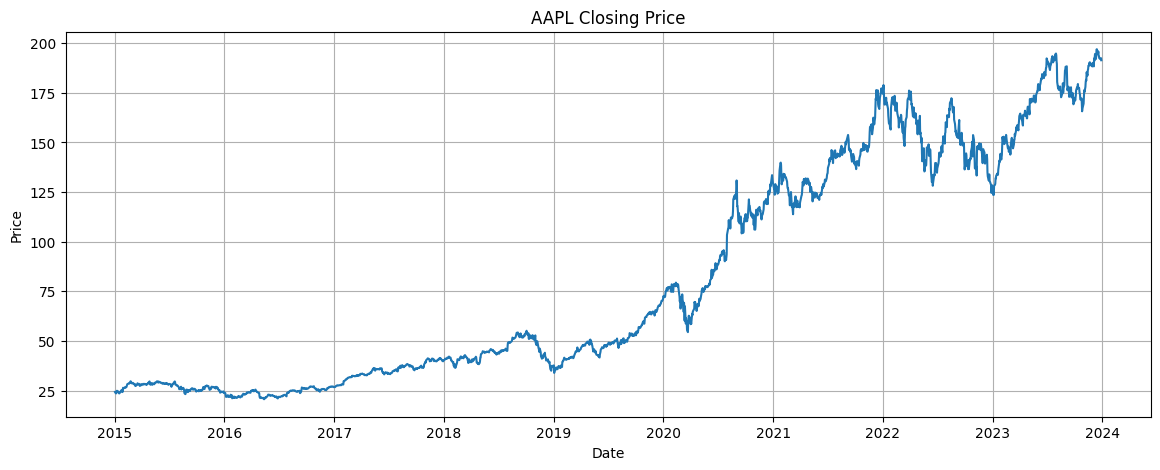

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(data['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


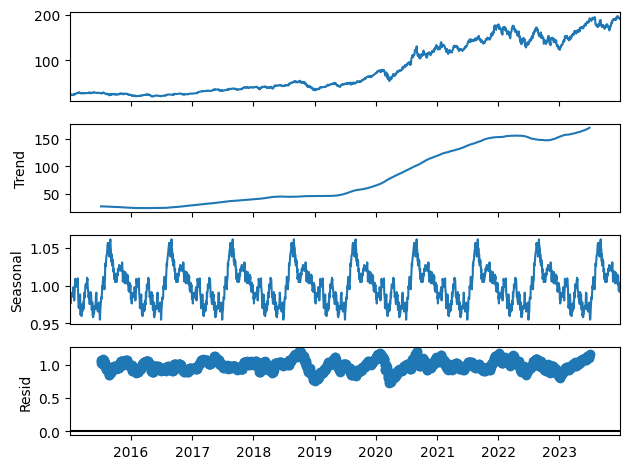

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data['Close'], model='multiplicative', period=252)
decompose.plot()
plt.show()


In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)



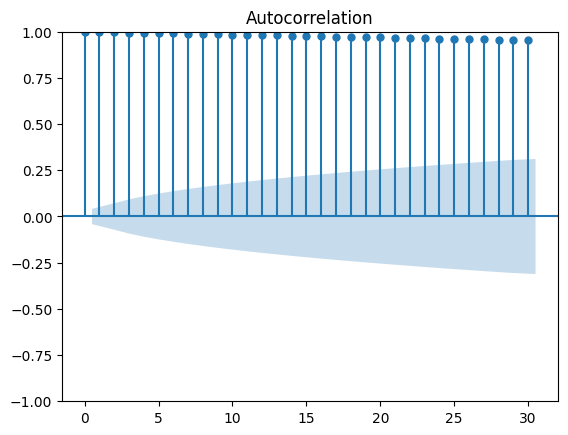

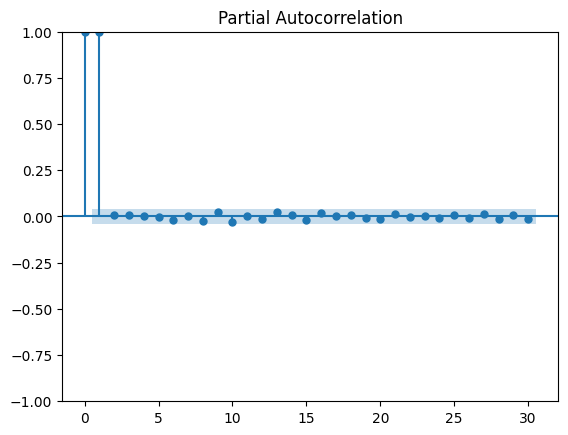

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'], lags=30)
plt.show()

plot_pacf(df['Close'], lags=30)
plt.show()


In [7]:
from pmdarima import auto_arima

auto_model = auto_arima(df['Close'], seasonal=False, trace=True)
auto_model.summary()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8967.102, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8964.061, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8962.838, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8962.666, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8965.738, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8963.274, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8963.243, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8965.049, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8964.656, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.867 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2235
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4478.333
Date:                Tue, 22 Apr 2025   AIC                           8962.666
Time:                        15:54:10   BIC                           8979.801
Sample:                             0   HQIC                          8968.922
                               - 2235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0730      0.037      1.999      0.046       0.001       0.145
ma.L1         -0.0400      0.013     -3.150      0.002      -0.065      -0.015
sigma2         3.2264      0.048     66.570      0.000       3.131       3.321
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3543.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              44.09   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# ARIMA Model Implementation
arima_order = (5, 1, 2)
arima_model = ARIMA(y_train, order=arima_order)
arima_fit = arima_model.fit()

# Forecasting with ARIMA
forecast = arima_fit.forecast(steps=len(y_test))  # Length matches y_test




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [46]:
# XGBoost Model Implementation
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# XGBoost Predictions
xgb_preds = xgb.predict(X_test)



In [47]:
# Hyperparameter tuning for XGBoost using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1]
}

search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

search.fit(X_train, y_train)
best_xgb = search.best_estimator_

# Best model predictions
best_preds = best_xgb.predict(X_test)



In [48]:
# Function to evaluate models
def evaluate(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

# Evaluating the models
y_true = y_test.values.ravel()
arima_pred = np.array(forecast).ravel()
xgb_pred = np.array(xgb_preds).ravel()
tuned_pred = np.array(best_preds).ravel()

# Evaluation Results
arima_mae, arima_rmse, arima_mape = evaluate(y_true, arima_pred)
xgb_mae, xgb_rmse, xgb_mape = evaluate(y_true, xgb_pred)
tuned_mae, tuned_rmse, tuned_mape = evaluate(y_true, tuned_pred)

# Printing evaluation results
print(f"ARIMA:         MAE={arima_mae:.2f}, RMSE={arima_rmse:.2f}, MAPE={arima_mape:.2f}%")
print(f"XGBoost:       MAE={xgb_mae:.2f},   RMSE={xgb_rmse:.2f},   MAPE={xgb_mape:.2f}%")
print(f"Tuned XGBoost: MAE={tuned_mae:.2f}, RMSE={tuned_rmse:.2f},   MAPE={tuned_mape:.2f}%")



ARIMA:         MAE=16.18, RMSE=18.69, MAPE=10.25%
XGBoost:       MAE=3.95,   RMSE=6.75,   MAPE=2.23%
Tuned XGBoost: MAE=3.54, RMSE=6.39,   MAPE=1.97%


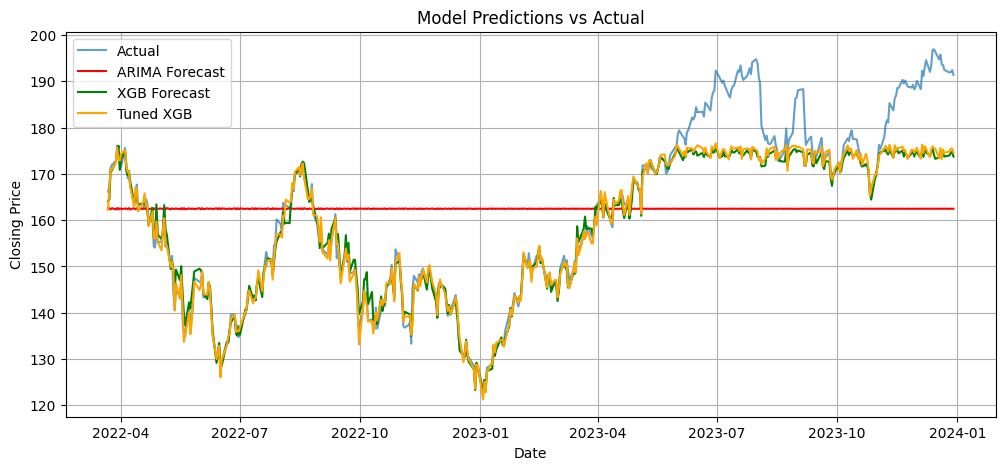

In [49]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_true, label='Actual', alpha=0.7)
plt.plot(y_test.index, arima_pred, label='ARIMA Forecast', color='red')
plt.plot(y_test.index, xgb_pred, label='XGB Forecast', color='green')
plt.plot(y_test.index, tuned_pred, label='Tuned XGB', color='orange')
plt.title("Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()




        Model       MAE      RMSE      MAPE
        ARIMA 16.182792 18.685203 10.254890
      XGBoost  3.954468  6.746208  2.229379
Tuned XGBoost  3.542586  6.393070  1.974921


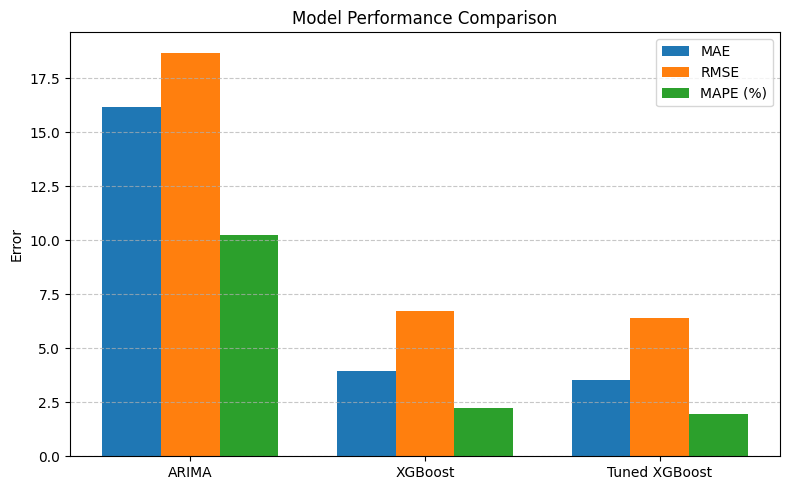

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


metrics_df = pd.DataFrame({
    'Model': ['ARIMA', 'XGBoost', 'Tuned XGBoost'],
    'MAE':   [arima_mae,  xgb_mae,    tuned_mae],
    'RMSE':  [arima_rmse, xgb_rmse,   tuned_rmse],
    'MAPE':  [arima_mape, xgb_mape,   tuned_mape]
})

print(metrics_df.to_string(index=False))


plt.figure(figsize=(8,5))
x = np.arange(len(metrics_df))
width = 0.25

plt.bar(x - width, metrics_df['MAE'],    width, label='MAE')
plt.bar(x,        metrics_df['RMSE'],   width, label='RMSE')
plt.bar(x + width,metrics_df['MAPE'],   width, label='MAPE (%)')

plt.xticks(x, metrics_df['Model'])
plt.ylabel('Error')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
